<a href="https://colab.research.google.com/github/stmeem/heart-disease-prediction/blob/main/heart_disease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Heart Disease Prediction Using Machine Learning

### Data Dictionary

age: Displays the age of the individual.

sex: Displays the gender of the individual using the following format :
1 = male
0 = female

cp- Chest-pain type: displays the type of chest-pain experienced by the individual using the following format :
0 = typical angina
1 = atypical angina
2 = non — anginal pain
3 = asymptotic

trestbps- Resting Blood Pressure: displays the resting blood pressure value of an individual in mmHg (unit). anything above 130-140 is typically cause for concern.

chol- Serum Cholestrol: displays the serum cholesterol in mg/dl (unit)

fbs- Fasting Blood Sugar: compares the fasting blood sugar value of an individual with 120mg/dl.
If fasting blood sugar > 120mg/dl then : 1 (true)
else : 0 (false)
'>126' mg/dL signals diabetes

restecg- Resting ECG : displays resting electrocardiographic results
0 = normal
1 = having ST-T wave abnormality
2 = left ventricular hyperthrophy

thalach- Max heart rate achieved : displays the max heart rate achieved by an individual.

exang- Exercise induced angina :
1 = yes
0 = no

oldpeak- ST depression induced by exercise relative to rest: displays the value which is an integer or float.

slope- Slope of the peak exercise ST segment :
0 = upsloping: better heart rate with excercise (uncommon)
1 = flat: minimal change (typical healthy heart)
2 = downsloping: signs of unhealthy heart

ca- Number of major vessels (0–3) colored by flourosopy : displays the value as integer or float.

thal : Displays the thalassemia :
1,3 = normal
6 = fixed defect
7 = reversible defect: no proper blood movement when excercising

target : Displays whether the individual is suffering from heart disease or not :
1 = yes
0 = no

### Importing necessary libraries

In [39]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import hvplot.pandas
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the dataset as dataframe using pandas

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [41]:
dataset= pd.read_csv('/content/drive/MyDrive/heart_disease_classification_dataset.csv')
dataset.head()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,male,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,yes
1,1,37,male,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,yes
2,2,41,female,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,yes
3,3,56,male,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,yes
4,4,57,female,0,NaN,354.0,0,1,163.0,1,0.6,2,0,2,yes


In [42]:
dataset.drop(dataset.columns[0], axis = 1, inplace = True)
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,male,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,yes
1,37,male,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,yes
2,41,female,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,yes
3,56,male,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,yes
4,57,female,0,NaN,354.0,0,1,163.0,1,0.6,2,0,2,yes


### Data Analysis

In [43]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    object 
 2   cp        303 non-null    int64  
 3   trestbps  299 non-null    float64
 4   chol      302 non-null    float64
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   298 non-null    float64
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    object 
dtypes: float64(4), int64(8), object(2)
memory usage: 33.3+ KB


In [44]:
dataset.target.value_counts()

yes    165
no     138
Name: target, dtype: int64

In [45]:
with_heart_disease = dataset.target.value_counts()[0]
without_heart_disease = dataset.target.value_counts()[1]
print('With Heart Disease: ', with_heart_disease)
print('Without Heart Disease: ', without_heart_disease)

With Heart Disease:  165
Without Heart Disease:  138


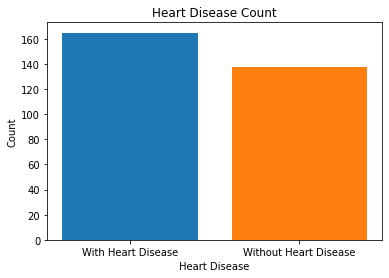

In [46]:
plt.bar(['With Heart Disease'], [with_heart_disease])
plt.bar(['Without Heart Disease'], [without_heart_disease])
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.title('Heart Disease Count')
plt.show()

### Data Pre-Processing

#### Handling Null Values

In [47]:
dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    4
chol        1
fbs         0
restecg     0
thalach     5
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [48]:
dataset=dataset.dropna(axis=0,subset=['trestbps','chol','thalach']) 

In [49]:
dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

#### Encoding Categorical Features

In [50]:
dataset['target'].unique()

array(['yes', 'no'], dtype=object)

In [51]:
dataset['target']=dataset['target'].map({'yes':1,'no':0})

In [52]:
dataset['sex'].unique()

array(['male', 'female'], dtype=object)

In [53]:
dataset['sex']=dataset['sex'].map({'male':1,'female':0})

In [54]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,1
1,37,1,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,1
2,41,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,1
3,56,1,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,1
5,57,1,0,140.0,192.0,0,1,148.0,0,0.4,1,0,1,1


### Correlation Matrix

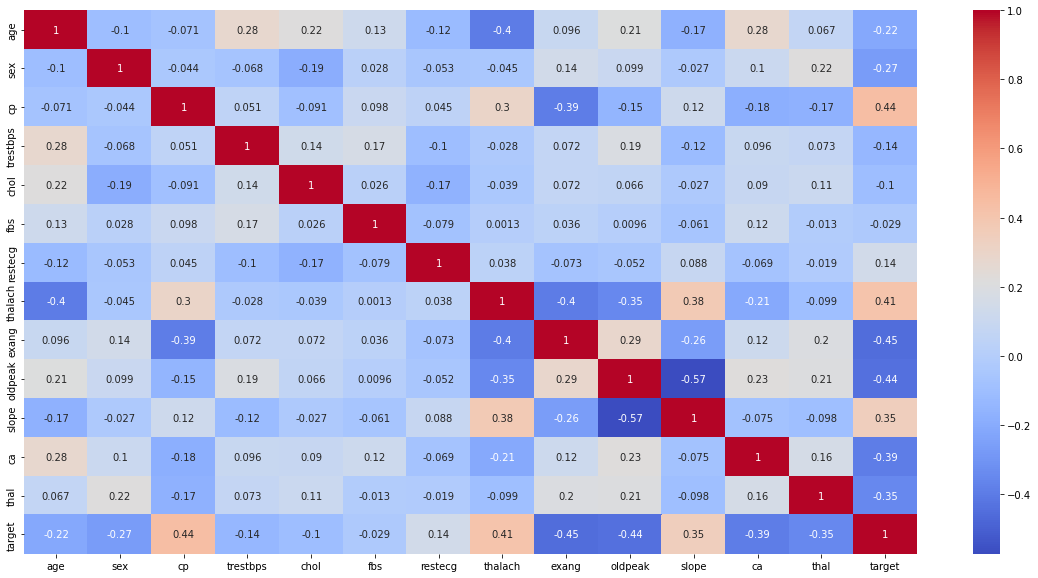

In [55]:
corrmat = dataset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,10))
heatmap=sns.heatmap(dataset[top_corr_features].corr(),annot=True,cmap="coolwarm")

In [56]:
dataset.drop('target', axis=1).corrwith(dataset.target).hvplot.barh(
    width=700, height=500, 
    title="Correlation between Heart Disease and Numerical Features", 
    ylabel='Correlation', xlabel='Numerical Features',
)

:Bars   [index]   (0)

fbs and chol are the lowest correlated with the target variable

### Building Model

In [59]:
y = dataset.target.values
x = dataset.drop(['target'], axis = 1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [60]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(234, 13)
(234,)
(59, 13)
(59,)


### Predicting Accuracy With ML Models

#### Decision Tree Classifier

In [61]:
from sklearn.tree import DecisionTreeClassifier

dclf = DecisionTreeClassifier(criterion='entropy',random_state=1)
dclf.fit(x_train,y_train)
dclf_predictions = dclf.predict(x_test)
decision_tree_accuracy= accuracy_score(y_test,dclf_predictions )*100
print('Decision Tree Testing Accuracy: ', decision_tree_accuracy)

Decision Tree Testing Accuracy:  77.96610169491525


#### Logistic Regression

In [62]:
from sklearn.linear_model import LogisticRegression

logistic_regression_model = LogisticRegression(max_iter=1000)
logistic_regression_model.fit(x_train, y_train) 
logistic_predictions =logistic_regression_model.predict(x_test)
logistic_regression_accuracy=accuracy_score(y_test, logistic_predictions)*100


print('Logistic Regression Testing Accuracy: ',logistic_regression_accuracy)

Logistic Regression Testing Accuracy:  83.05084745762711


#### Support Vector Machine (SVM)

In [63]:
from sklearn.svm import SVC

svc_model = SVC(kernel="linear")
svc_model.fit(x_train, y_train)
svc_predictions= svc_model.predict(x_test)
svc_accuracy=accuracy_score(y_test,svc_predictions)*100
print('SVM Testing Accuracy: ',svc_accuracy)

SVM Testing Accuracy:  81.35593220338984


#### Random Forest

In [64]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=50)
rfc.fit(x_train, y_train)

rfc_predictions = rfc.predict(x_test)
rfc_accuracy= accuracy_score(y_test, rfc_predictions)*100
print('Random Forest Testing Accuracy', rfc_accuracy)

Random Forest Testing Accuracy 81.35593220338984


#### Neural Network (Multilayer Perceptron Classifier)

In [65]:
from sklearn.neural_network import MLPClassifier
nnc=MLPClassifier(hidden_layer_sizes=(7), activation="relu", max_iter=10000)
nnc.fit(x_train, y_train)

nnc_predictions = nnc.predict(x_test)
nnc_accuracy= accuracy_score(y_test, nnc_predictions)*100
print('Neural Network Testing Accuracy', nnc_accuracy)

Neural Network Testing Accuracy 72.88135593220339


#### Extreme Gradient Boost

In [66]:
import xgboost
from xgboost import XGBClassifier

xgb_model = XGBClassifier(eval_metric='mlogloss', use_label_encoder =False)
xgb_model.fit(x_train, y_train)

xgb_pred = xgb_model.predict(x_test)
xgb_accuracy = accuracy_score(y_test,xgb_pred)*100
print('XGBoost Testing accuracy',xgb_accuracy)

XGBoost Testing accuracy 74.57627118644068


#### Light Gradient Boosting Machine

In [67]:
import lightgbm as lgb

lgb_model = lgb.LGBMClassifier()
lgb_model.fit(x_train, y_train)

lgb_pred = lgb_model.predict(x_test)
lgb_accuracy = accuracy_score(y_test,lgb_pred)*100
print('LightGBM Testing accuracy',lgb_accuracy)

LightGBM Testing accuracy 79.66101694915254


### Model Evaluation

In [68]:
model_evaluation = pd.DataFrame({'Model': ['Decision Tree','Logistic Regression',
                                          'Support Vector Machine','Neural Network',
                                          'XGBoost','LightGBM'], 'Accuracy': [decision_tree_accuracy,
                                           logistic_regression_accuracy,svc_accuracy,nnc_accuracy,
                                            xgb_accuracy,lgb_accuracy]})
model_evaluation

,Model,Accuracy
0,Decision Tree,77.966102
1,Logistic Regression,83.050847
2,Support Vector Machine,81.355932
3,Neural Network,72.881356
4,XGBoost,74.576271
5,LightGBM,79.661017


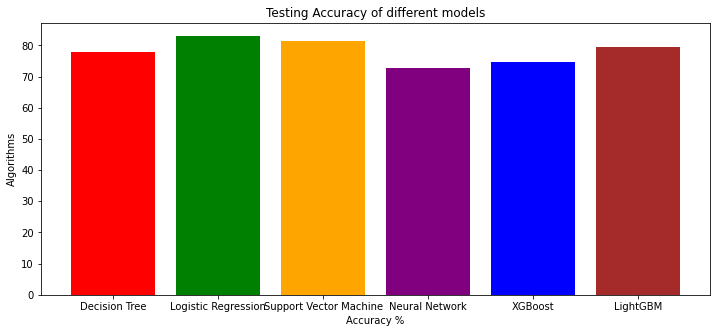

In [69]:
colors = ['red','green','orange','purple','blue','brown']
plt.figure(figsize=(12,5))
plt.title("Testing Accuracy of different models")
plt.xlabel("Accuracy %")
plt.ylabel("Algorithms")
plt.bar(model_evaluation['Model'],model_evaluation['Accuracy'],color = colors)
plt.show()